<a href="https://colab.research.google.com/github/hamadbinghanem/masar/blob/main/Project2_HamadBinGhanem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Predicition for Houses Prices
>> Jumanah Jan



```
Dataset called Seeds its contained 210 Instances and 9 features.
Brief description: Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

The source: ( https://data.world/databeats/seeds ).
```



# 1- Data Cleaning

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv('https://raw.githubusercontent.com/DSomair/Masar_DS/main/Datasets/Week%233/seeds_dataset.csv')
data
df = data

In [2]:
#Explore the data
data.head(10)

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,6,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,7,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,8,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,9,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,10,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    210 non-null    int64  
 1   area                  210 non-null    float64
 2   perimeter             210 non-null    float64
 3   compactness           210 non-null    float64
 4   lengthOfKernel        210 non-null    float64
 5   widthOfKernel         210 non-null    float64
 6   asymmetryCoefficient  210 non-null    float64
 7   lengthOfKernelGroove  210 non-null    float64
 8   seedType              210 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.9 KB


In [4]:
#The column
data.columns

Index(['ID', 'area', 'perimeter', 'compactness', 'lengthOfKernel',
       'widthOfKernel', 'asymmetryCoefficient', 'lengthOfKernelGroove',
       'seedType'],
      dtype='object')



```
The target is [seedType]
seedType: types of wheat kernels: Kama, Rosa, Canadian represented as 1, 2, 3
```



In [5]:
#Check data types
data.dtypes

ID                        int64
area                    float64
perimeter               float64
compactness             float64
lengthOfKernel          float64
widthOfKernel           float64
asymmetryCoefficient    float64
lengthOfKernelGroove    float64
seedType                  int64
dtype: object

In [6]:
#Check the null (missing values)
data.isnull().sum()

ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64



```
# No missing valuse
```



In [7]:
#Total of each culumn
data.sum()

ID                      22155.0000
area                     3117.9800
perimeter                3057.4500
compactness               182.9097
lengthOfKernel           1181.9920
widthOfKernel             684.3070
asymmetryCoefficient      777.0422
lengthOfKernelGroove     1135.6950
seedType                  420.0000
dtype: float64

In [8]:
#Max value
data.area.max()

21.18

In [9]:
#Check for duplicate rows
data.duplicated().sum()

0

In [10]:
#Check for outliers (Five point summury)
data.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


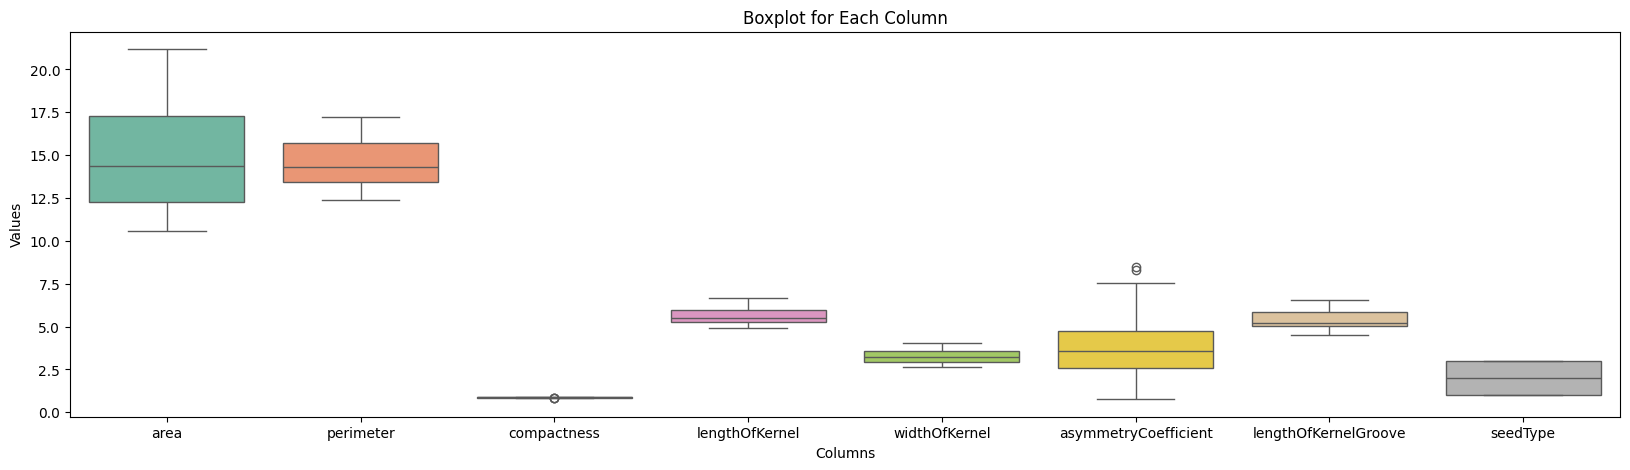

In [11]:
#Set the matplotlib
plt.figure(figsize=(20, 5))
#Create boxplots for each column using seaborn
sns.boxplot(data=data.drop('ID', axis=1), orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

## 2- Data Processing

In [12]:
# Normalization using StandardScaler
dataProcess = data
columnsToNormalize = ['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove']
scaler = StandardScaler()
dataProcess[columnsToNormalize] = scaler.fit_transform(dataProcess[columnsToNormalize])
dataProcess

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,2,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,3,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,4,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,5,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1
...,...,...,...,...,...,...,...,...,...
205,206,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,3
206,207,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,3
207,208,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,3
208,209,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,3


In [13]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
dataProcess[columnsToNormalize] = min_max_scaler.fit_transform(dataProcess[columnsToNormalize])
dataProcess

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,2,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,3,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,4,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,5,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1
...,...,...,...,...,...,...,...,...,...
205,206,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,3
206,207,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,3
207,208,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,3
208,209,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,3


In [14]:
dataProcess.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,2,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,3,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,4,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,5,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1


In [15]:
#Create a sample dataset
sampleData = {'Area': [15.26, 13.84, 16.63, 14.69, 12.30],
        'Perimeter': [14.84, 13.94, 15.46, 14.49, 13.34]}

sampleDf = pd.DataFrame(sampleData)

#Original DataFrame
print("Original DataFrame:")
print(sampleDf)

#Compute Compactness: C = 4(PI)A / P^2 Where C= compactness, A= area, P= perimeter, PI= 3.14159
sampleDf['Compactness'] = (4 * 3.14159 * sampleDf['Area']) / (sampleDf['Perimeter'] ** 2)

# Display the final DataFrame with Compactness
print("\nDataFrame with Compactness:")
print(sampleDf)

Original DataFrame:
    Area  Perimeter
0  15.26      14.84
1  13.84      13.94
2  16.63      15.46
3  14.69      14.49
4  12.30      13.34

DataFrame with Compactness:
    Area  Perimeter  Compactness
0  15.26      14.84     0.870756
1  13.84      13.94     0.894994
2  16.63      15.46     0.874345
3  14.69      14.49     0.879214
4  12.30      13.34     0.868566


# 3- Data Visualization

In [16]:
#Drop the [ID] column
dataDiagram = data.drop('ID', axis=1)

In [17]:
dataDiagram.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1


## Scatterplot

Text(0.5, 1.02, 'Scatterplot of seeds features by seed type')

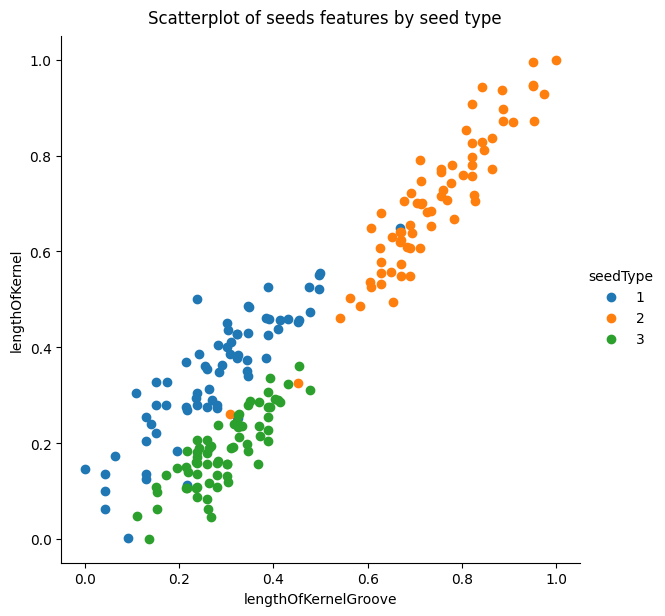

In [18]:
sns.FacetGrid(dataDiagram, hue ="seedType", height = 6).map(plt.scatter, 'lengthOfKernelGroove' ,'lengthOfKernel').add_legend()
plt.suptitle("Scatterplot of seeds features by seed type", y=1.02)

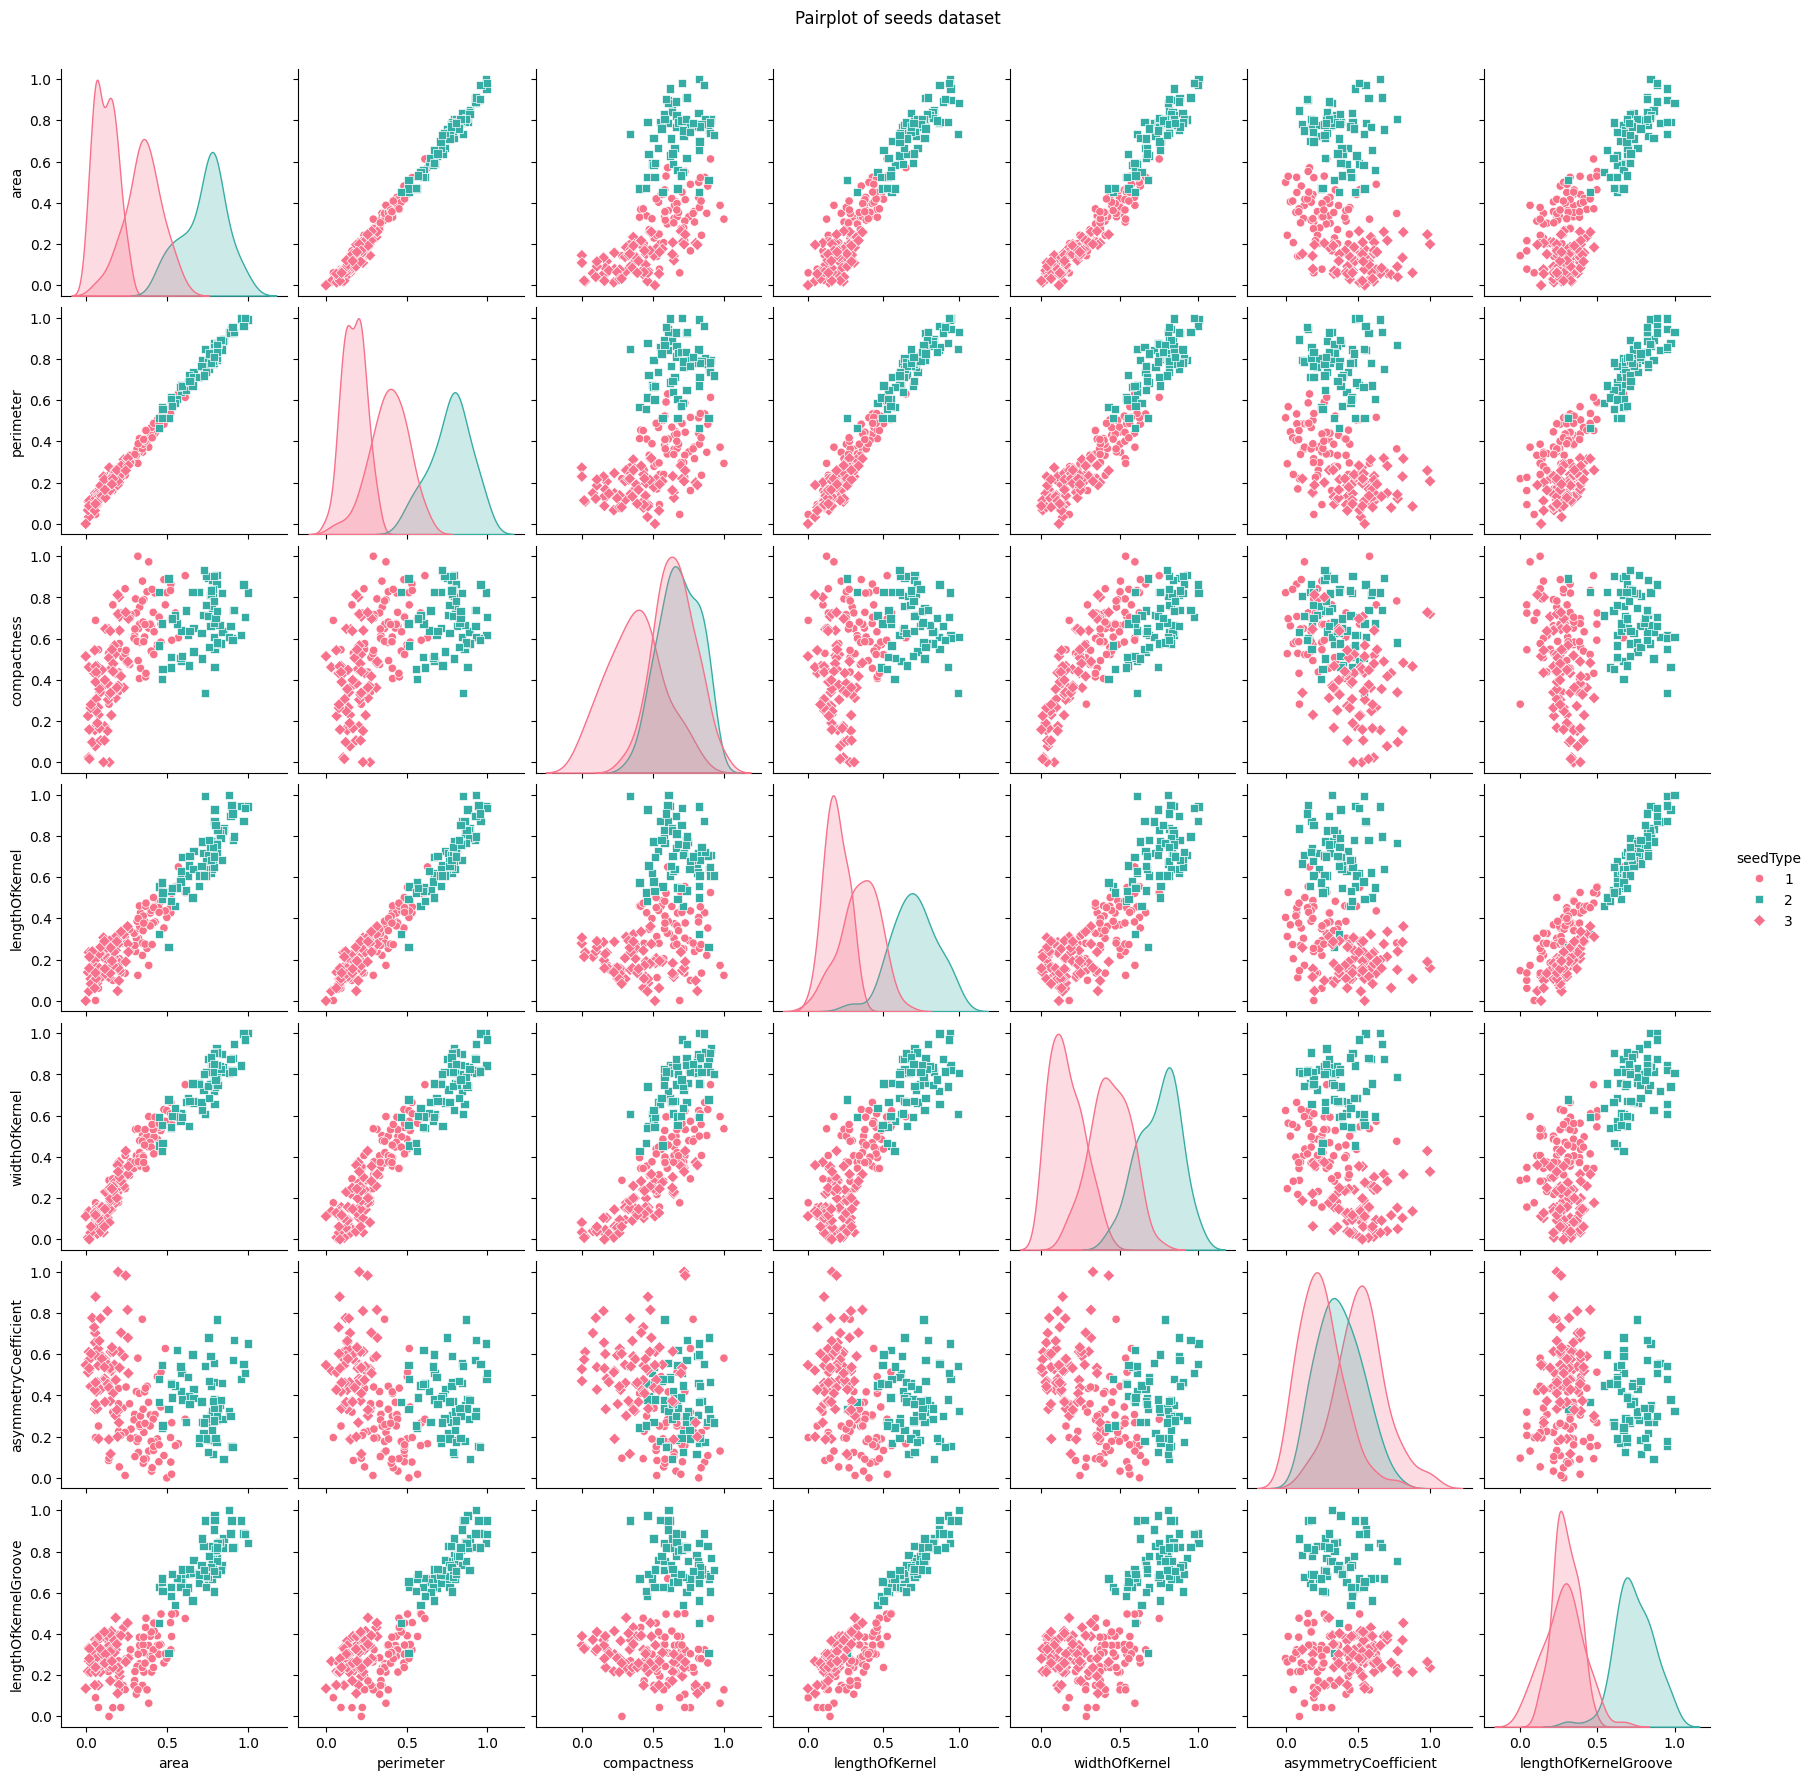

In [19]:
# Pairplot: Scatterplot Matrix
sns.pairplot(dataDiagram, hue="seedType", palette="husl", markers=["o", "s", "D"])
plt.suptitle("Pairplot of seeds dataset", y=1.02)
plt.show()

## Boxplot

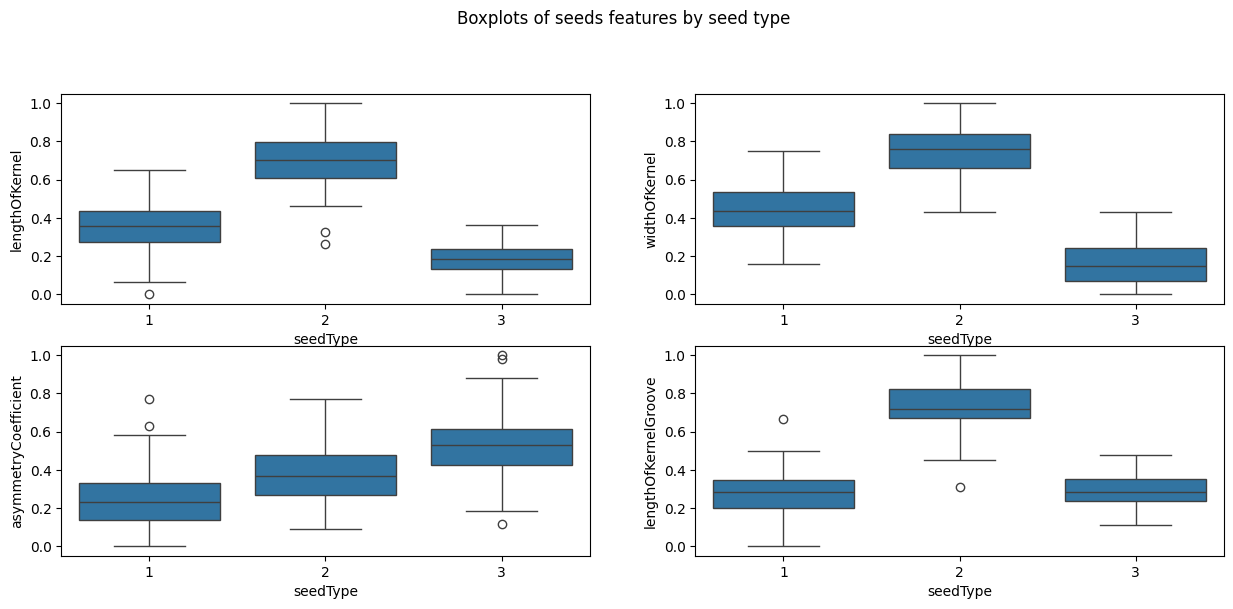

In [20]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="seedType", y="lengthOfKernel", data=dataDiagram)
plt.subplot(2, 2, 2)
sns.boxplot(x="seedType", y="widthOfKernel", data=dataDiagram)
plt.subplot(2, 2, 3)
sns.boxplot(x="seedType", y="asymmetryCoefficient", data=dataDiagram)
plt.subplot(2, 2, 4)
sns.boxplot(x="seedType", y="lengthOfKernelGroove", data=dataDiagram)
plt.suptitle("Boxplots of seeds features by seed type", y=1.02)
plt.show()

## Violin plot

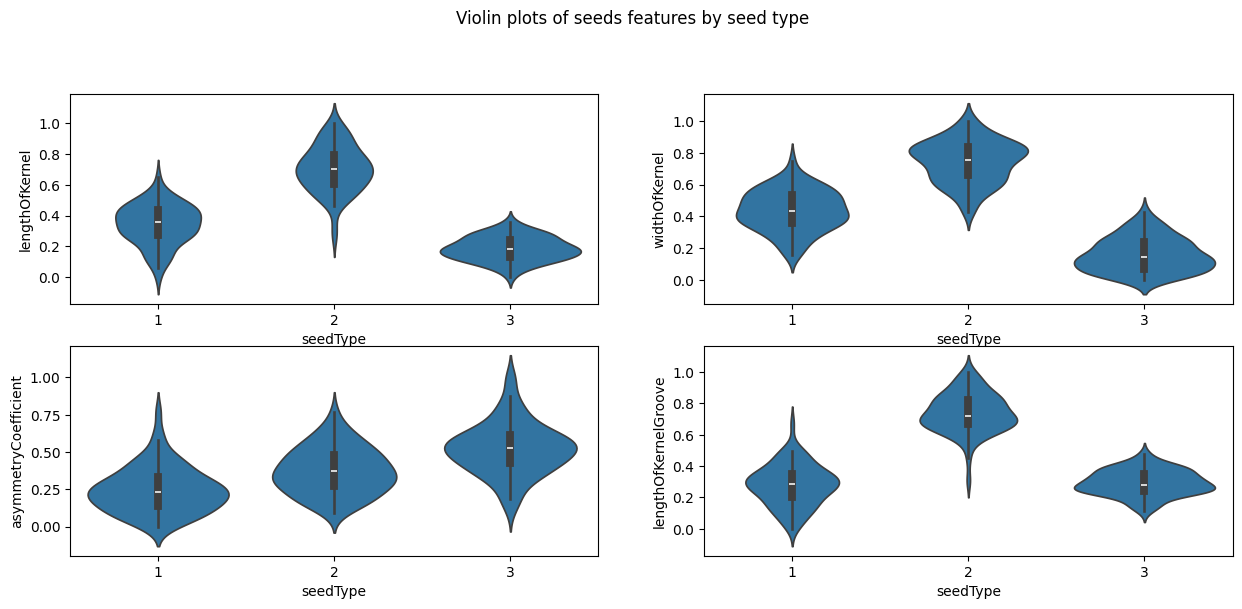

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="seedType", y="lengthOfKernel", data=dataDiagram)
plt.subplot(2, 2, 2)
sns.violinplot(x="seedType", y="widthOfKernel", data=dataDiagram)
plt.subplot(2, 2, 3)
sns.violinplot(x="seedType", y="asymmetryCoefficient", data=dataDiagram)
plt.subplot(2, 2, 4)
sns.violinplot(x="seedType", y="lengthOfKernelGroove", data=dataDiagram)
plt.suptitle("Violin plots of seeds features by seed type", y=1.02)
plt.show()

## Correlation Matrix

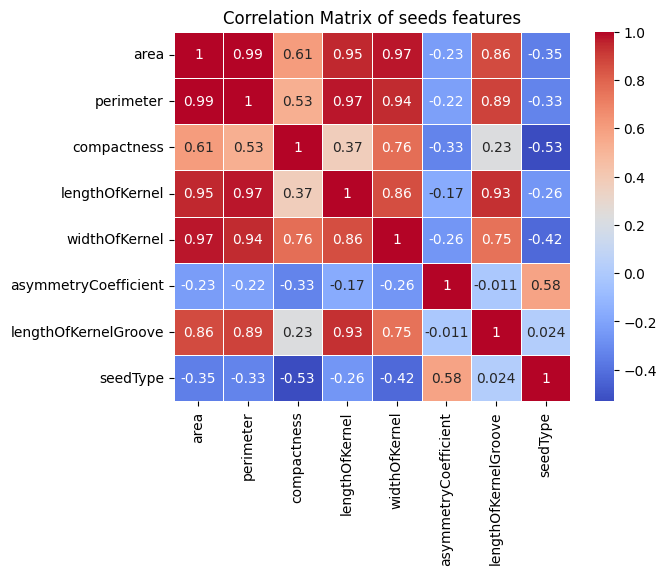

In [22]:
correlation_matrix = dataDiagram.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of seeds features")
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Assuming 'seedType' is the label and the rest are features
X = df[['compactness', 'asymmetryCoefficient']]
y = df['seedType']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

# Get the coefficients
coefficients = model.coef_[0]

# Print the coefficients for each feature
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

Accuracy: 0.6547619047619048
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.75      0.68        28
           2       0.58      0.52      0.55        29
           3       0.79      0.70      0.75        27

    accuracy                           0.65        84
   macro avg       0.66      0.66      0.66        84
weighted avg       0.66      0.65      0.65        84

compactness: 1.0317296354904613
asymmetryCoefficient: -2.2850250248063753


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


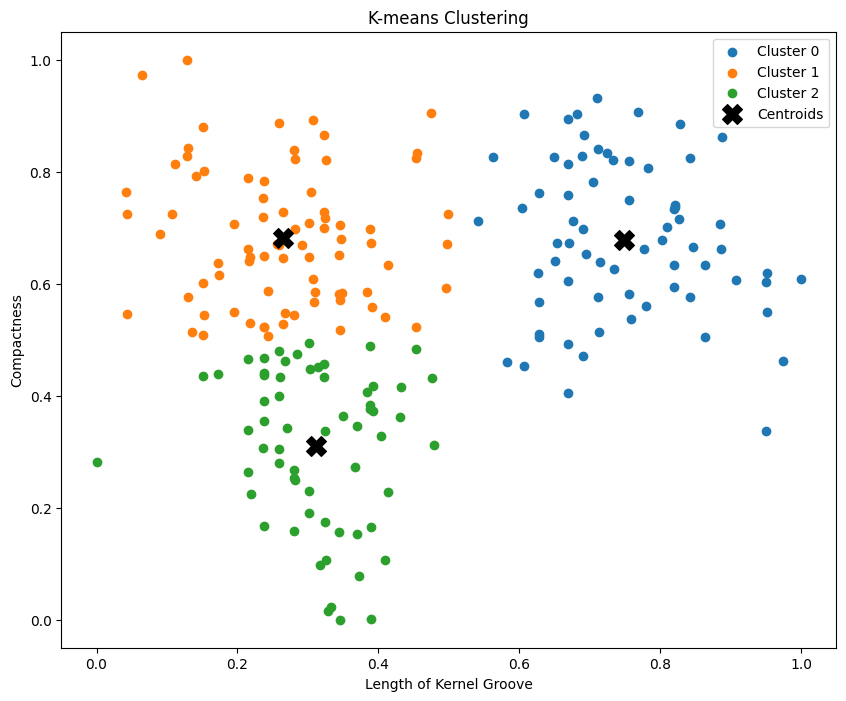

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features
X = df[['lengthOfKernelGroove', 'compactness']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
n_clusters = 3  # Adjust as needed

# Create K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
labels = kmeans.labels_
df['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 8))

for cluster in range(n_clusters):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['lengthOfKernelGroove'], cluster_points['compactness'], label=f'Cluster {cluster}')

# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Length of Kernel Groove')
plt.ylabel('Compactness')
plt.legend()
plt.show()


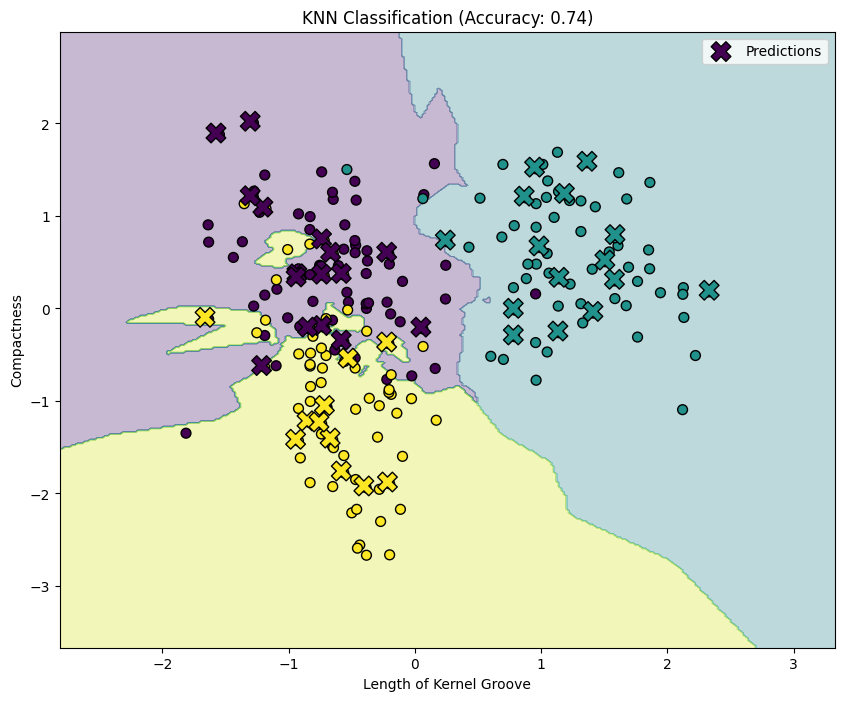

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Extract features and target variable
X = df[['lengthOfKernelGroove', 'compactness']]
y = df['seedType']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the number of neighbors (K)
n_neighbors = 3

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the decision boundaries
plt.figure(figsize=(10, 8))

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

# Plot data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, marker='X', s=200, cmap='viridis', edgecolor='k', label='Predictions')

plt.title(f'KNN Classification (Accuracy: {accuracy:.2f})')
plt.xlabel('Length of Kernel Groove')
plt.ylabel('Compactness')
plt.legend()
plt.show()
